# Información y Programación Financiera, TI, Algoritmos y Ciencia de Datos

Neftalí Valdez

<a href="http://twitter.com/neftalivldz" target="_blank">@neftalivldz</a> | <a href="mailto:nvaldez@tec.mx">nvaldez@tec.mx</a>

In [31]:
#!pip3 install eikon
#!pip3 install cufflinks
#!pip3 install seaborn

# Importar librerías

In [33]:
import eikon as ek  # the Eikon Python wrapper package
import numpy as np  # NumPy
import pandas as pd  # pandas
import cufflinks as cf  # Cufflinks
import configparser as cp
cf.set_config_file(offline=True)  # set the plotting mode to offline

In [34]:
# Se inicia la conexión a refinitiv mediante eikon 

In [35]:
cfg = cp.ConfigParser()
cfg.read('../refinitiv.cfg')
ek.set_app_key(cfg['eikon']['app_id'])

In [1]:
!pwd

/Users/neftalivaldez/app/tec-finanzas-2023


### Numpy

In [2]:
# Python program to demonstrate
# basic array characteristics
import numpy as np
 
# Creating array object
arr = np.array( [[ 1, 2, 3],
                 [ 4, 2, 5]] )
 
# Printing type of arr object
print("Array is of type: ", type(arr))
 
# Printing array dimensions (axes)
print("No. of dimensions: ", arr.ndim)
 
# Printing shape of array
print("Shape of array: ", arr.shape)
 
# Printing size (total number of elements) of array
print("Size of array: ", arr.size)
 
# Printing type of elements in array
print("Array stores elements of type: ", arr.dtype)

Array is of type:  <class 'numpy.ndarray'>
No. of dimensions:  2
Shape of array:  (2, 3)
Size of array:  6
Array stores elements of type:  int64


## Python Pandas

In [5]:
import pandas as pd 

data = {
  "sesion": [420, 380, 390],
  "asistencia": [25, 20, 27]
}

#load data into a DataFrame object:
df = pd.DataFrame(data)

df

,sesion,asistencia
0,420,25
1,380,20
2,390,27


In [6]:
#utilización de índice:
print(df.loc[2])

sesion        390
asistencia     27
Name: 2, dtype: int64


In [8]:
df = pd.DataFrame(data, index = ["dia1", "dia2", "dia3"])

df 

,sesion,asistencia
dia1,420,25
dia2,380,20
dia3,390,27


In [9]:
df

,sesion,asistencia
dia1,420,25
dia2,380,20
dia3,390,27


# Refinitiv Python

# Extracción de datos estructurados

Las funciones básicas para extraer datos de eikon son las siguiente:
- get_symbology
- get_data
- get_timeseries

get_symbology(symbol, from_symbol_type='RIC', to_symbol_type=None, raw_output=False, debug=False, bestMatch=True)
Devuelve una lista de nombre de instrumentos convertiods en el código del intrumento.

get_data(instruments, fields, parameters=None, field_name=False, raw_output=False, debug=False)
Devuelve un dataframe de pandas con campos en columnas e intrumentos como índice de renglones.

get_timeseries(rics, fields='*', start_date=None, end_date=None, interval='daily', count=None, calendar=None, corax=None, normalize=False, raw_output=False, debug=False)
Devuelve series históricas de uno o varios RICs.
<br>
Referencia: https://docs-developers.refinitiv.com/1594387995587/14684/book/en/eikon/index.html
RICs Reuters instrument code

# Obtener datos

In [15]:
data, err = ek.get_data(["SPOT.K", "IBM", "GOOG.O", "MSFT.O"], ["TR.PriceClose", "TR.Volume", "TR.PriceLow", "TR.TotalReturnYTD"])

In [16]:
data

,Instrument,Price Close,Volume,Price Low,YTD Total Return
0,SPOT.K,120.35,1711860,119.26,52.438252
1,IBM,131.71,4251258,131.66,-5.362457
2,GOOG.O,92.05,28265285,92.0,3.741688
3,MSFT.O,252.67,28301668,251.59,5.624202


In [17]:
type(data)

pandas.core.frame.DataFrame

In [19]:
data.index

RangeIndex(start=0, stop=4, step=1)

# Obtener datos de un índice

In [22]:
dax = ek.get_data('0#.GDAXI', fields=['TR.CommonName', 'TR.PriceClose',
                                      'TR.Volume', 'TR.TotalReturnYTD'])[0]

In [24]:
dax

,Instrument,Company Common Name,Price Close,Volume,YTD Total Return
0,BASFn.DE,BASF SE,52.49,2003891,13.149386
1,IFXGn.DE,Infineon Technologies AG,34.52,2550873,22.523765
2,SIEGn.DE,Siemens AG,143.74,921292,14.109593
3,EONGn.DE,E ON SE,10.24,4755581,9.70645
4,DBKGn.DE,Deutsche Bank AG,11.596,5266856,9.520212
5,SATG_p.DE,Sartorius AG,420.0,90555,13.697888
6,SAPG.DE,SAP SE,107.76,1530426,11.795829
7,BAYGn.DE,Bayer AG,59.25,1662729,22.607346
8,RWEG.DE,RWE AG,40.39,2202143,-2.885309
9,1COV.DE,Covestro AG,41.74,1085961,14.199726


In [23]:
dax[0:5]

,Instrument,Company Common Name,Price Close,Volume,YTD Total Return
0,BASFn.DE,BASF SE,52.49,2003891,13.149386
1,IFXGn.DE,Infineon Technologies AG,34.52,2550873,22.523765
2,SIEGn.DE,Siemens AG,143.74,921292,14.109593
3,EONGn.DE,E ON SE,10.24,4755581,9.70645
4,DBKGn.DE,Deutsche Bank AG,11.596,5266856,9.520212


In [26]:
dax.set_index('Instrument')['YTD Total Return']

Instrument
BASFn.DE     13.149386
IFXGn.DE     22.523765
SIEGn.DE     14.109593
EONGn.DE       9.70645
DBKGn.DE      9.520212
SATG_p.DE    13.697888
SAPG.DE      11.795829
BAYGn.DE     22.607346
RWEG.DE      -2.885309
1COV.DE      14.199726
HNKG_p.DE     4.767764
ZALG.DE      18.121413
DTEGn.DE     12.190149
LINI.DE       0.180062
MRCG.DE       1.354339
PSHG_p.DE     7.064793
VOWG_p.DE    12.592338
BMWG.DE      18.373711
BEIG.DE       6.110075
HEIG.DE      20.382883
MTXGn.DE     13.946588
FMEG.DE      21.557082
FREG.DE       9.904762
DPWGn.DE     14.340534
ALVG.DE       8.213041
MUVGn.DE      7.302632
CONG.DE      22.865309
SHLG.DE       9.631407
SY1G.DE      -5.105755
ADSGn.DE      7.814216
HNRGn.DE     -2.048518
DTGGe.DE      6.719641
ENR1n.DE      4.779516
MBGn.DE      21.482085
BNRGn.DE     22.237106
AIRG.DE      10.271144
VNAn.DE      13.306085
DB1Gn.DE      4.894672
QIA.DE       -5.679643
P911_p.DE    19.577836
Name: YTD Total Return, dtype: Float64

In [55]:
dax.set_index('Instrument')['YTD Total Return'].sort_values().iplot(kind='bar', color='blue')

In [ ]:
generen grafico para volumen de menor a mayor DJI

In [49]:
lp4 = ek.get_data('LP40065886', ['TR.FundHoldingRIC','TR.FundHoldingName',
                           'TR.FundPercentageOfFundAssets',
                           'TR.FundNumberOfShares',
                           'TR.FundNumberOfSharesChanged'],
            {'Endnum':'5000'})[0]

In [50]:
lp4

,Instrument,Holding RIC,Holding Name,Percentage of Fund Assets,Number of Shares,Number of Shares Changed
0,LP40065886,AAPL.OQ,APPLE INC ORD,5.3777,10205990.0,67032.0
1,LP40065886,MSFT.OQ,MICROSOFT CORP ORD,4.5546,5032980.0,31551.0
2,LP40065886,AMZN.OQ,AMAZON.COM INC ORD,2.2045,5853476.0,32076.0
3,LP40065886,GOOGL.OQ,ALPHABET INC CLASS A ORD,1.4645,4057503.0,43199.0
4,LP40065886,BRKb.N,BERKSHIRE HATHAWAY INC ORD,1.2727,1118776.0,8465.0
...,...,...,...,...,...,...
3555,LP40065886,,MIRAGEN THERAPEUTICS INC CVR,0.0,67673.0,0.0
3556,LP40065886,ANGN.OQ,ANGION BIOMEDICA CORP ORD,0.0,17453.0,0.0
3557,LP40065886,LHDX.OQ,LUCIRA HEALTH INC ORD,0.0,12487.0,0.0
3558,LP40065886,NEXI.OQ,NEXIMMUNE INC ORD,0.0,14792.0,0.0


In [46]:
dax.set_index('Instrument')['YTD Total Return'].sort_values().iplot(kind='bar', color='blue')

tuple

In [51]:
XLE= ek.get_data('XLE', ['TR.FundHoldingRIC','TR.FundHoldingName', 'TR.FundPercentageOfFundAssets',
                           'TR.FundNumberOfShares', 'TR.FundNumberOfSharesChanged'],
            {'Endnum':'5000'})[0]

In [52]:
XLE

,Instrument,Holding RIC,Holding Name,Percentage of Fund Assets,Number of Shares,Number of Shares Changed
0,XLE,XOM.N,EXXON MOBIL CORP ORD,23.41,85651581.0,903479.0
1,XLE,CVX.N,CHEVRON CORP ORD,18.889,46072089.0,486014.0
2,XLE,SLB.N,SCHLUMBERGER NV ORD,4.9591,36940902.0,389655.0
3,XLE,COP.N,CONOCOPHILLIPS ORD,4.5282,15770957.0,166403.0
4,XLE,EOG.N,EOG RESOURCES INC ORD,4.4434,14260820.0,150428.0
5,XLE,MPC.N,MARATHON PETROLEUM CORP ORD,4.1514,13710609.0,144676.0
6,XLE,PXD.N,PIONEER NATURAL RESOURCES CO ORD,3.7723,6950903.0,73316.0
7,XLE,VLO.N,VALERO ENERGY CORP ORD,3.7208,11278375.0,118981.0
8,XLE,PSX.N,PHILLIPS 66 ORD,3.2663,13826737.0,145867.0
9,XLE,OXY.N,OCCIDENTAL PETROLEUM CORP ORD,3.247,21271979.0,224342.0


In [56]:
XLE.set_index('Holding RIC')['Number of Shares']

Holding RIC
XOM.N           85651581.0
CVX.N           46072089.0
SLB.N           36940902.0
COP.N           15770957.0
EOG.N           14260820.0
MPC.N           13710609.0
PXD.N            6950903.0
VLO.N           11278375.0
PSX.N           13826737.0
OXY.N           21271979.0
HES.N            8117527.0
DVN.N           19123815.0
WMB.N           35632263.0
HAL.N           26564666.0
KMI.N           57866280.0
BKR.OQ          29297728.0
OKE.N           13075516.0
FANG.OQ          5148757.0
CTRA.N          23066372.0
MRO.N           18578734.0
TRGP.N           6622537.0
APA.OQ           9405759.0
EQT.N           10737842.0
XAEH3             190000.0
LP40098642    136944337.79
                1956953.68
                      <NA>
Name: Number of Shares, dtype: Float64

In [60]:
XLE[(XLE['Holding RIC'] != '')].set_index('Holding RIC')['Number of Shares'].sort_values().iplot(kind='bar', color='blue')

# Descargar series de tiempo

In [47]:
#help(ek.get_timeseries)

In [63]:
import datetime as dt
today = dt.datetime.today()
d = today - dt.timedelta(days=1000)
print(today, d)

2023-02-23 20:54:32.469038 2020-05-29 20:54:32.469038


In [64]:
df_ts = ek.get_timeseries(["000001.SZ"], start_date = "2016-06-14", end_date = "2016-06-20", interval="daily", corax = 'adjusted' )
df_ts

000001.SZ,HIGH,CLOSE,LOW,OPEN,VOLUME
Date,,,,,
2016-06-14,8.674997,8.666663,8.599997,8.616663,32836484.334594
2016-06-15,8.73333,8.699997,8.599997,8.60833,45380707.352283
2016-06-16,8.6,8.57,8.53,8.57,38667008.0
2016-06-17,8.61,8.58,8.54,8.57,31517300.0
2016-06-20,8.6,8.6,8.56,8.59,27073158.0


In [65]:
import datetime as dt
today = dt.datetime.today()
d = today - dt.timedelta(days=100)
print(today, d)

2023-02-23 20:54:39.570986 2022-11-15 20:54:39.570986


In [66]:
df_ts = ek.get_timeseries(["000001.SZ"], start_date = "2016-06-14", end_date = "2016-06-20", interval="daily", corax = 'unadjusted')
df_ts

000001.SZ,HIGH,CLOSE,LOW,OPEN,VOLUME
Date,,,,,
2016-06-14,10.41,10.4,10.32,10.34,27363726
2016-06-15,10.48,10.44,10.32,10.33,37817241
2016-06-16,8.6,8.57,8.53,8.57,38667008
2016-06-17,8.61,8.58,8.54,8.57,31517300
2016-06-20,8.6,8.6,8.56,8.59,27073158


In [67]:
df_ts = ek.get_timeseries(["MSFT.O"], start_date = d, end_date = today, interval="daily", corax = 'unadjusted')
df_ts

MSFT.O,HIGH,CLOSE,LOW,OPEN,COUNT,VOLUME
Date,,,,,,
2022-11-16,243.8,241.73,240.42,242.79,270175,24093272
2022-11-17,243.25,241.68,237.63,237.78,267476,23123544
2022-11-18,243.74,241.22,239.03,243.51,265827,27613523
2022-11-21,244.67,242.05,241.19,241.43,270840,26394700
2022-11-22,245.31,245.03,240.71,243.59,216514,19665699
...,...,...,...,...,...,...
2023-02-16,266.74,262.15,261.9,264.02,389914,29603616
2023-02-17,260.09,258.06,256.0,259.39,392724,30000055
2023-02-21,255.49,252.67,251.59,254.48,341326,28397444


In [68]:
type(df_ts)

pandas.core.frame.DataFrame

In [69]:
df_ts.columns

Index(['HIGH', 'CLOSE', 'LOW', 'OPEN', 'COUNT', 'VOLUME'], dtype='object', name='MSFT.O')

In [70]:
#df_ts.values

In [71]:
df_ts['CLOSE']

Date
2022-11-16    241.73
2022-11-17    241.68
2022-11-18    241.22
2022-11-21    242.05
2022-11-22    245.03
               ...  
2023-02-16    262.15
2023-02-17    258.06
2023-02-21    252.67
2023-02-22    251.51
2023-02-23    254.77
Name: CLOSE, Length: 67, dtype: Float64

In [72]:
#podemos usar la seleccion boleeana dentro del pandas.DataFrame
df_ts[(df_ts['CLOSE'] > 250) & (df_ts['CLOSE'] <= 310)]

MSFT.O,HIGH,CLOSE,LOW,OPEN,COUNT,VOLUME
Date,,,,,,
2022-11-30,255.33,255.14,239.86,240.57,448911,47594239
2022-12-01,256.12,254.69,250.9156,253.87,352799,26041524
2022-12-02,256.06,255.02,249.69,249.82,278398,21528520
2022-12-05,253.819,250.2,248.06,252.01,276722,23435294
2022-12-12,252.54,252.51,247.17,247.445,325566,30665069
2022-12-13,263.915,256.92,253.07,261.69,486404,42196884
2022-12-14,262.588,257.22,254.31,257.13,458428,35410933
2023-02-01,255.18,252.75,245.47,248.0,386960,31259912
2023-02-02,264.69,264.6,257.25,258.82,533820,39940437


In [73]:
df_ts.index

DatetimeIndex(['2022-11-16', '2022-11-17', '2022-11-18', '2022-11-21',
               '2022-11-22', '2022-11-23', '2022-11-25', '2022-11-28',
               '2022-11-29', '2022-11-30', '2022-12-01', '2022-12-02',
               '2022-12-05', '2022-12-06', '2022-12-07', '2022-12-08',
               '2022-12-09', '2022-12-12', '2022-12-13', '2022-12-14',
               '2022-12-15', '2022-12-16', '2022-12-19', '2022-12-20',
               '2022-12-21', '2022-12-22', '2022-12-23', '2022-12-27',
               '2022-12-28', '2022-12-29', '2022-12-30', '2023-01-03',
               '2023-01-04', '2023-01-05', '2023-01-06', '2023-01-09',
               '2023-01-10', '2023-01-11', '2023-01-12', '2023-01-13',
               '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20',
               '2023-01-23', '2023-01-24', '2023-01-25', '2023-01-26',
               '2023-01-27', '2023-01-30', '2023-01-31', '2023-02-01',
               '2023-02-02', '2023-02-03', '2023-02-06', '2023-02-07',
      

In [74]:
today_date = dt.date.today()
d = today_date - dt.timedelta(days=10)
print(d)

2023-02-13


In [75]:
#Podemos seleccionar una sola fila, como lo haciamos en numpy, de la siguiente manera:
df_ts.iloc[[0]]

MSFT.O,HIGH,CLOSE,LOW,OPEN,COUNT,VOLUME
Date,,,,,,
2022-11-16,243.8,241.73,240.42,242.79,270175,24093272


In [76]:
#El atributo pandas.DateFrame.loc nos permite indexar las filas en vez de las columnas
df_ts.loc[[d]]

MSFT.O,HIGH,CLOSE,LOW,OPEN,COUNT,VOLUME
Date,,,,,,
2023-02-13,274.6,271.32,267.15,267.64,499426,44630921


# Estadística básica

In [77]:
dax_corto = dax['Instrument'][0:10].tolist()
dax_corto

['BASFn.DE',
 'IFXGn.DE',
 'SIEGn.DE',
 'EONGn.DE',
 'DBKGn.DE',
 'SATG_p.DE',
 'SAPG.DE',
 'BAYGn.DE',
 'RWEG.DE',
 '1COV.DE']

In [79]:
today = dt.datetime.today()
d = today - dt.timedelta(days=100)
print(today, d)

2023-02-23 20:57:40.852908 2022-11-15 20:57:40.852908


In [82]:
df = ek.get_timeseries(dax_corto, start_date = d, end_date = today, fields='CLOSE', interval="daily")
df

CLOSE,BASFn.DE,IFXGn.DE,SIEGn.DE,EONGn.DE,DBKGn.DE,SATG_p.DE,SAPG.DE,BAYGn.DE,RWEG.DE,1COV.DE
Date,,,,,,,,,,
2022-11-16,49.57,32.055,121.12,8.892,10.134,380.7,106.84,52.62,39.89,35.59
2022-11-17,48.955,31.875,129.58,8.882,10.1,376.0,107.68,52.53,40.62,35.43
2022-11-18,49.625,32.095,132.5,9.116,10.212,377.3,105.16,53.79,41.21,36.29
2022-11-21,48.67,31.505,129.1,9.08,10.218,373.4,106.24,54.4,40.99,35.02
2022-11-22,49.52,31.67,130.68,9.0,10.168,367.6,105.62,54.61,41.3,36.61
...,...,...,...,...,...,...,...,...,...,...
2023-02-17,52.24,35.235,145.44,10.165,11.88,427.1,109.48,59.12,39.52,42.04
2023-02-20,53.11,34.92,144.66,10.215,11.632,429.2,109.28,58.94,39.55,42.52
2023-02-21,52.49,34.52,143.74,10.24,11.596,420.0,107.76,59.25,40.39,41.74


In [89]:
df.describe()

CLOSE,BASFn.DE,IFXGn.DE,SIEGn.DE,EONGn.DE,DBKGn.DE,SATG_p.DE,SAPG.DE,BAYGn.DE,RWEG.DE,1COV.DE
count,71.0,71.0,71.0,71.0,71.0,71.0,71.0,71.0,71.0,71.0
mean,50.221408,32.106408,137.122535,9.592972,11.046042,390.747887,105.127746,54.570352,41.061127,39.508028
std,2.635083,2.299063,6.852048,0.453521,0.791595,35.563608,4.34331,3.716146,1.063031,2.744283
min,45.52,28.065,121.12,8.882,9.713,339.2,96.39,48.325,38.67,35.02
25%,47.8925,30.73,130.95,9.133,10.211,360.55,102.41,52.185,40.395,36.8
50%,51.06,31.765,135.44,9.79,11.356,377.3,105.94,55.45,41.3,40.49
75%,52.75,33.525,143.51,9.991,11.699,419.4,108.07,56.95,41.86,42.045
max,54.04,36.645,149.42,10.42,12.34,465.9,112.58,62.49,42.75,44.07


In [83]:
correlacion = df[dax_corto].corr()
print(correlacion)

CLOSE      BASFn.DE  IFXGn.DE  SIEGn.DE  EONGn.DE  DBKGn.DE  SATG_p.DE  \
CLOSE                                                                    
BASFn.DE   1.000000  0.678360  0.851432  0.859709  0.855673   0.837957   
IFXGn.DE   0.678360  1.000000  0.773288  0.598498  0.443590   0.885769   
SIEGn.DE   0.851432  0.773288  1.000000  0.901385  0.815016   0.875133   
EONGn.DE   0.859709  0.598498  0.901385  1.000000  0.916118   0.799103   
DBKGn.DE   0.855673  0.443590  0.815016  0.916118  1.000000   0.714816   
SATG_p.DE  0.837957  0.885769  0.875133  0.799103  0.714816   1.000000   
SAPG.DE    0.792742  0.910362  0.768002  0.584147  0.487151   0.865788   
BAYGn.DE   0.755790  0.881311  0.812007  0.638446  0.524024   0.854616   
RWEG.DE   -0.474642 -0.382035 -0.372454 -0.501374 -0.473463  -0.407968   
1COV.DE    0.918528  0.647426  0.886854  0.931894  0.908253   0.821541   

CLOSE       SAPG.DE  BAYGn.DE   RWEG.DE   1COV.DE  
CLOSE                                              
BASFn.D

<Axes: xlabel='CLOSE', ylabel='CLOSE'>

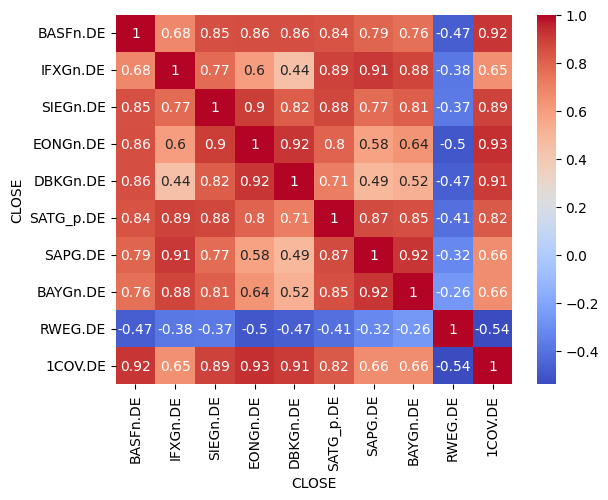

In [85]:
import seaborn as sns
sns.heatmap(df[dax_corto].corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

# Bibliografía

Python for Finance, 2nd Edition. December 2018 O'Reilly Media, Inc.
Numpy | ndarray Last Updated : 28 Jun, 2021 https://www.geeksforgeeks.org/numpy-ndarray/
Machine Learning for Trading, Tucker Balch, Arpan Chakraborty, Udacity. https://www.udacity.com/course/machine-learning-for-trading--ud501